# Trabalho Prático - C209 L4

Rafael Areias Silveira

1. Juntar todas as imagens em uma única

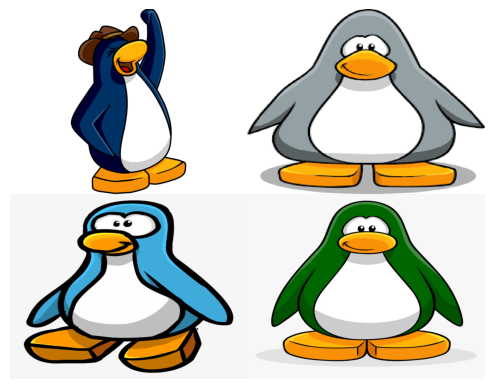

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Carrega as imagens
img1 = Image.open("P1.png")
img2 = Image.open("P2.png")
img3 = Image.open("P3.jpg")
img4 = Image.open("P4.png")

# Padroniza as dimesões das imagens
largura, altura = img1.size 
img2 = img2.resize((largura, altura))
img3 = img3.resize((largura, altura))
img4 = img4.resize((largura, altura))

# Define o tamanho da imagem final
juntos = Image.new("RGB", (largura * 2, altura * 2))

# Posicionamento as imagens
juntos.paste(img1, (0, 0))
juntos.paste(img2, (largura, 0))
juntos.paste(img3, (0, altura))
juntos.paste(img4, (largura, altura))

# Exibe o resultado e salva
plt.imshow(juntos) 
plt.axis('off')
juntos.save("juntos.png")


2. Trocar as cores (mudar a cor dos pinguins para qualquer outra)

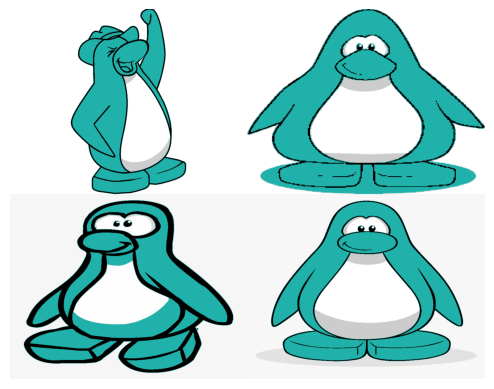

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carrega a imagem e converte para array
img = Image.open('juntos.png')
image = np.array(img) 

# Define a nova cor em RGB
nova_cor = [32, 178, 170] 

# Máscara para áreas brancas
mascara_branca = np.all(image > 200, axis=-1)

# Máscara para áreas pretas
mascara_preta = np.all(image < 30, axis=-1)

# Combinação das máscaras (pintar onde não é branco e nem preto)
mascara_pinguins = ~mascara_branca & ~mascara_preta

# Aplica a nova cor 
image_modificada = image.copy()
image_modificada[mascara_pinguins] = nova_cor

# Converte de array para imagem
colorida = Image.fromarray(image_modificada)

# Exibe o resultado e salva
plt.imshow(colorida)
plt.axis('off')
colorida.save("colorida.png")



3. Aplicar espelhamento

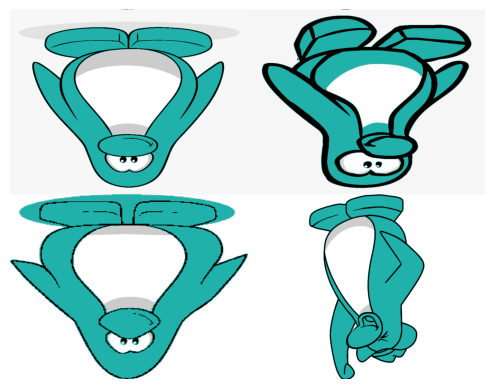

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carrega a imagem e converte para array
img = Image.open('colorida.png')
image = np.array(img) 

# Recebe as informações de linhas e colunas
l, c = image.shape[0], image.shape[1]

# Cria um array preto de mesmas dimensões para ser a nova imagem
img_refl = np.zeros(shape=image.shape, dtype=np.uint8)

# Para cada linha e cada coluna
for i in range(l):
    for j in range(c):
        new_x = -j          # Inverte horizontalmente               
        new_y = -i          # Inverte verticalmente

        img_refl[new_y, new_x] = image[i, j]  # Coloca o pixel na nova posição

# Converte de array para imagem
espelhada = Image.fromarray(img_refl)

# Exibe o resultado e salva
plt.imshow(espelhada)
plt.axis('off')
espelhada.save("espelhada.png")


4. Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).

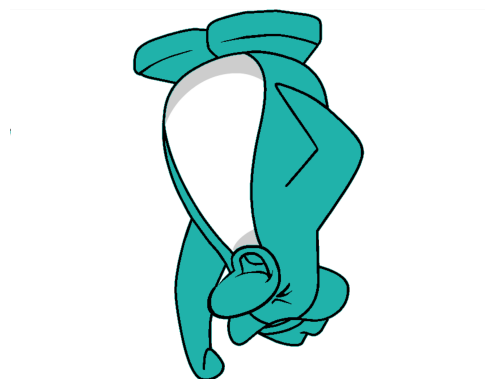

In [135]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Carregar a imagem e converte para array
img = Image.open('espelhada.png')
image = np.array(img)

# Dimensões da imagem
altura, largura = image.shape[0], image.shape[1]

# Cálculo das coordenadas de recorte
metade_largura = largura // 2
metade_altura = altura // 2

# Recortar a região selecionada (pinguim inferior direito)
pinguim_recortado = image[metade_altura:altura, metade_largura:largura]

# Converte de array para imagem
recortado = Image.fromarray(pinguim_recortado)

# Mostrar o pinguim recortado e salva
plt.imshow(recortado)
plt.axis('off')
recortado.save("recortado.png")


5. Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold)

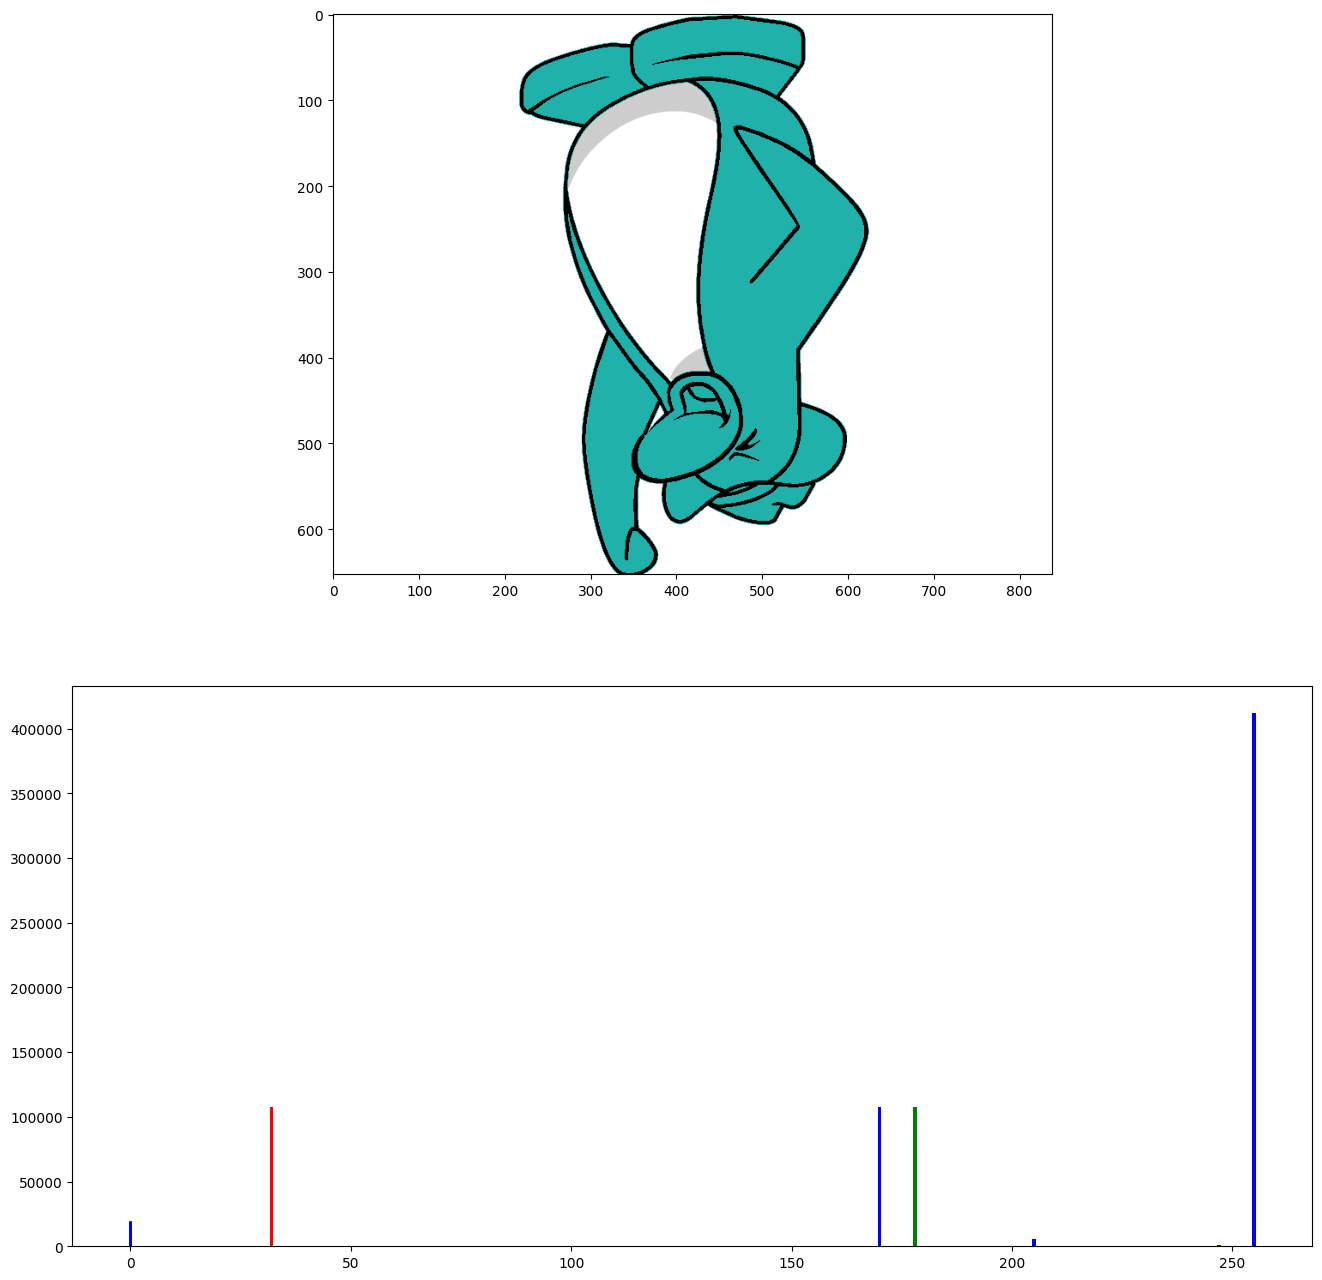

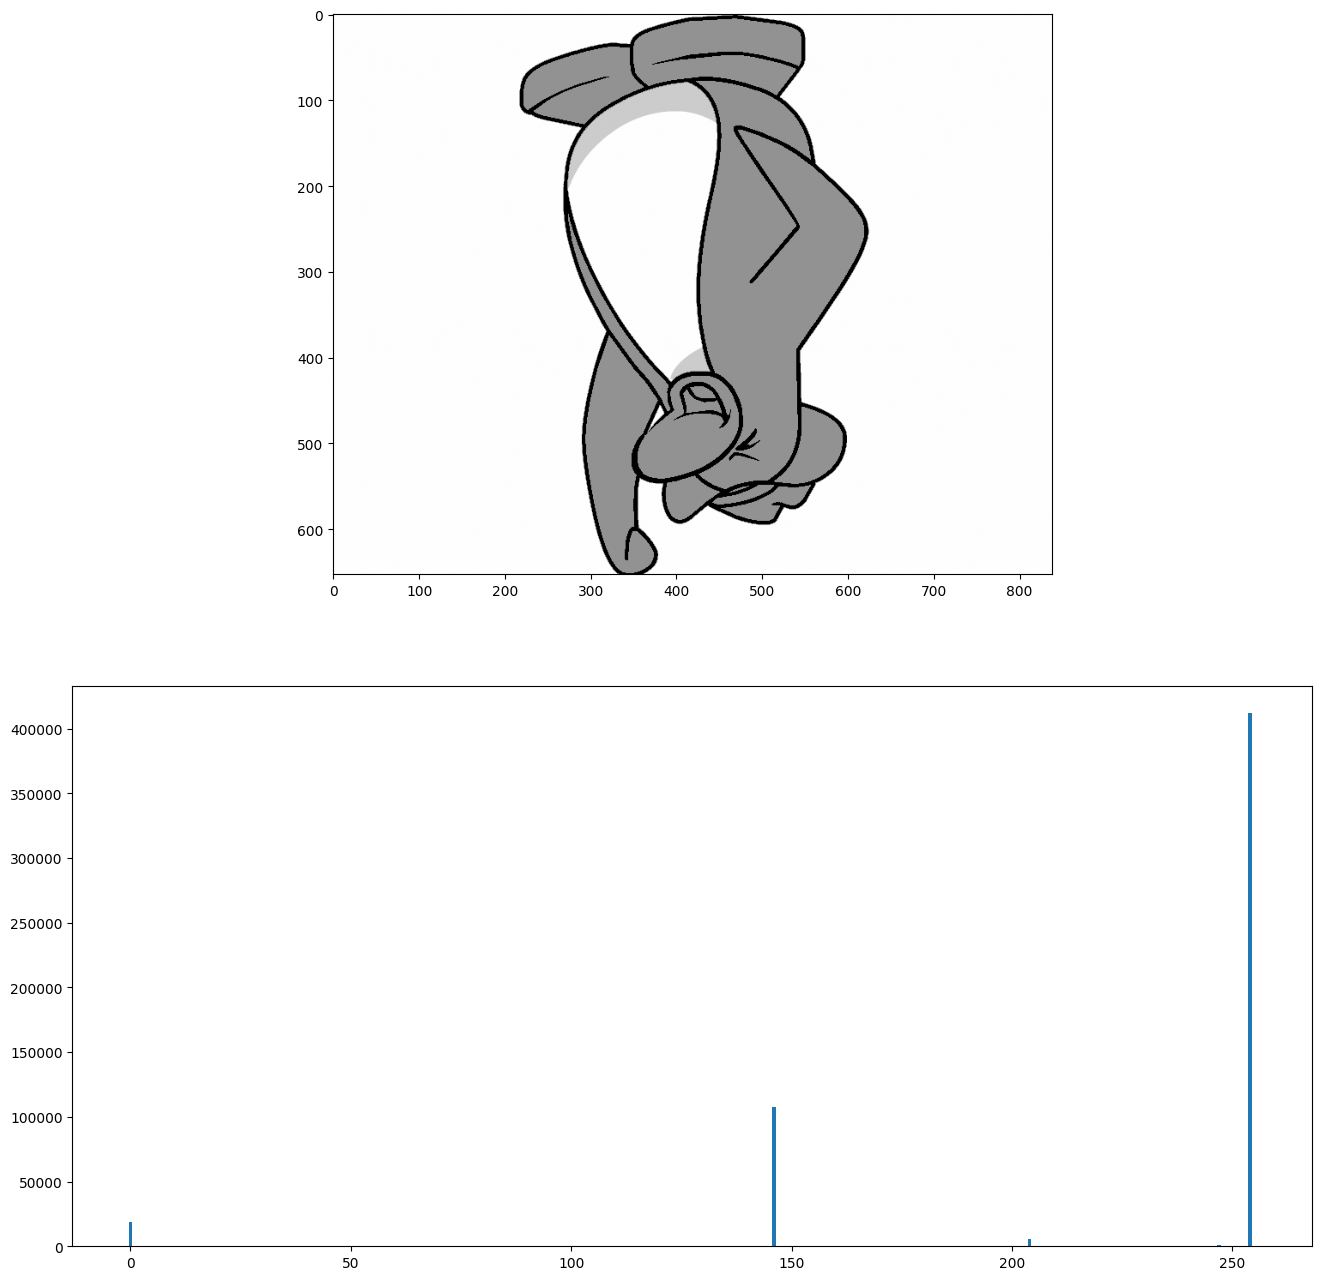

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

peng = np.array(Image.open('recortado.png'))
(l, c, p) = peng.shape
peng_gray = ((0.2126 * peng[:, :, 0]) + (0.7152 * peng[:, :, 1]) + (0.0722 * peng[:, :, 2])).astype(np.uint8)

# Converte de array para imagem e salva para posterior uso 
cinza = Image.fromarray(peng_gray)
cinza.save("cinza.png")

def histogram_gray(img):
    (l, c) = img.shape
    # Histograma com 1 linha e 256 colunas, preenchido com 0.
    histogram = np.zeros(256, dtype=np.int32)

    for i in range(l):
        for j in range(c):
            # Normalizar intensidade do pixel 
            intensity = img[i, j]
            # Incrementar de 1 a quantidade de pixels no histograma,
            # utilizando a intensidade como índice.
            histogram[intensity] += 1
            
    return histogram

def show_histogram_gray(img):
    histogram = histogram_gray(img)
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    # vmin e vmax não permitem que o matplotlib faça normalização das cores.
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

def show_histogram(img):
    histogram_r = histogram_gray(img[:, :, 0])
    histogram_g = histogram_gray(img[:, :, 1])
    histogram_b = histogram_gray(img[:, :, 2])
    
    plt.figure(figsize=(16, 16))
    plt.subplot(2, 1, 1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram_r, color='red')
    plt.bar(range(256), histogram_g, color='green')
    plt.bar(range(256), histogram_b, color='blue')

show_histogram(peng)
show_histogram_gray(peng_gray)

O valor de threshold escolhido foi de 147 que, de acordo com o histograma cinza acima, representa a maior parte dos pixels diferentes de branco.


6.	Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)

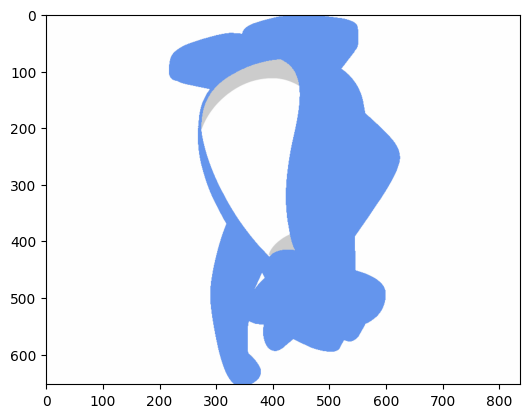

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Carregando a imagem do pinguim em escala de cinza
penguin = np.array(Image.open('cinza.png'))

def apply_color_threshold(penguin_gray, threshold, color=(100, 149, 237)):
    # Convertendo imagem de escala de cinza para RGB
    result_img = np.stack([penguin_gray]*3, axis=-1)
    
    # Aplicando a cor azul onde a intensidade for menor que o threshold
    below_threshold = penguin_gray < threshold
    
    result_img[below_threshold] = color
    
    return result_img

# Definindo o valor de threshold
threshold_value = 147

# Aplicando a conversão para a cor azul nos pixels abaixo do threshold
recolorido = apply_color_threshold(penguin, threshold_value)

# Convertendo o array em uma imagem
recolorido = Image.fromarray(recolorido)

# Exibindo e salvando a imagem do pinguim com a cor aplicada
plt.imshow(recolorido)

recolorido.save('recolorido.png')